In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##EDA - Exploratory data analysis

EDA for Under water image enhancement

In [22]:
import os
import numpy as np
import tensorflow as tf
import cv2
import zipfile
from glob import glob
import matplotlib.pyplot as plt

In [26]:
#train data unzip
extraction_directory = '/content/extracted_data/'
os.makedirs(extraction_directory, exist_ok=True)
with zipfile.ZipFile("/content/drive/MyDrive/Under_water/train_under_water.zip", 'r') as zip_ref:
     zip_ref.extractall(extraction_directory)

In [27]:
#Test data unzip
extraction_directory = '/content/extracted_data/'
os.makedirs(extraction_directory, exist_ok=True)
with zipfile.ZipFile("/content/drive/MyDrive/Under_water/test_under_water.zip", 'r') as zip_ref:
     zip_ref.extractall(extraction_directory)

In [28]:
#Importing data
image_folder_path = '/content/extracted_data/lrd'

# List the image files in the folder
image_files = os.listdir(image_folder_path)

In [29]:
len(image_files)

1620

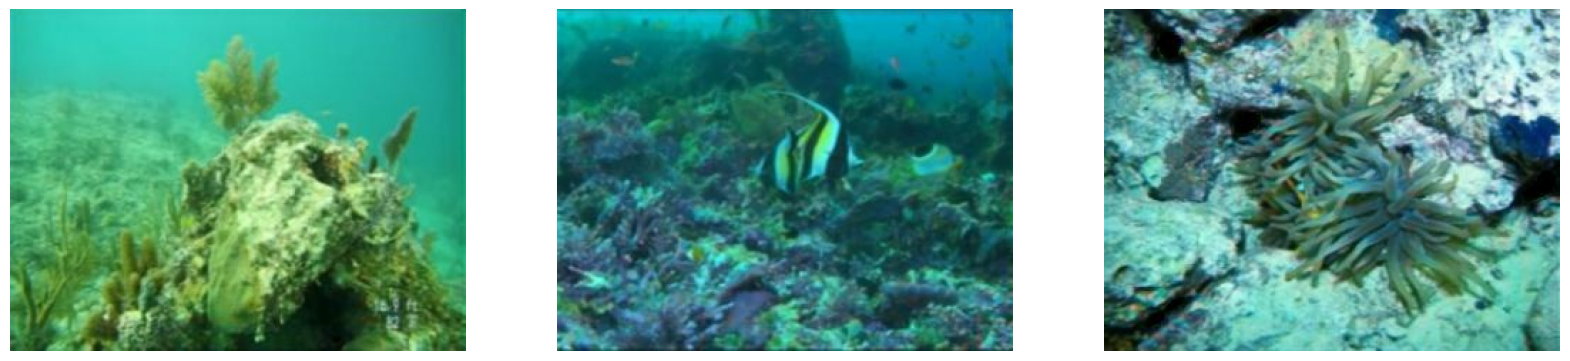

In [30]:
# Load and display a few sample images
num_images_to_display = 3
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 10))

for i in range(num_images_to_display):
    image_path = os.path.join(image_folder_path, image_files[i])
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

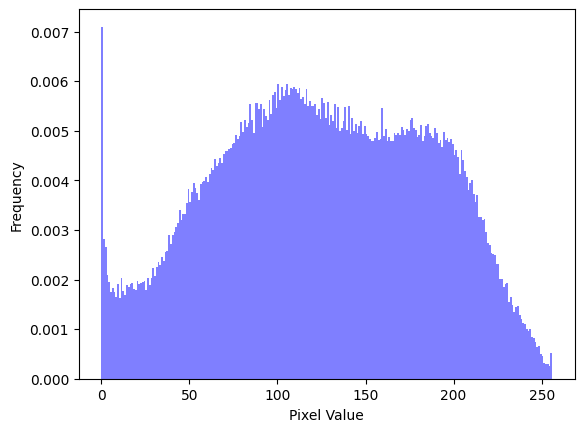

In [31]:
# Calculate mean and standard deviation of pixel values
mean_pixel_value = np.mean(image)
std_pixel_value = np.std(image)

# Plot pixel value distribution
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.5)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [32]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
MAX_TRAIN_IMAGES = 400


train_images = sorted(glob("/content/extracted_data/lrd/*"))
val_images = sorted(glob("/content/extracted_data/lrd/*"))[MAX_TRAIN_IMAGES:]
test_images = sorted(glob("/content/extracted_data/lrd/*"))[:MAX_TRAIN_IMAGES]

In [33]:
len(train_images),len(val_images),len(test_images)

(1620, 1220, 400)

In [37]:
def load_data(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = image / 255.0
    return image

def data_generator(low_light_images):
    dataset = tf.data.Dataset.from_tensor_slices((low_light_images))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset

In [45]:
train_dataset = data_generator(train_images)
val_dataset = data_generator(val_images)

print("Train Dataset:", train_dataset)
print("Validation Dataset:", val_dataset)

Train Dataset: <_BatchDataset element_spec=TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32, name=None)>
Validation Dataset: <_BatchDataset element_spec=TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32, name=None)>


In [44]:
len(train_dataset), len(val_dataset) ,

(101, 76)